In [54]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
#assets = ['ITSA4.SA', '^BVSP']
#assets = ['POMO4.SA', '^GSPC']
assets = ['UNIP6.SA', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [120]:
pf_data.tail()

,UNIP6.SA,^GSPC
Date,,
2019-09-02,29.500000,NaN
2019-09-03,29.570000,2906.270020
2019-09-04,31.110001,2937.780029
2019-09-05,30.910000,2976.000000
2019-09-06,31.290001,2978.709961


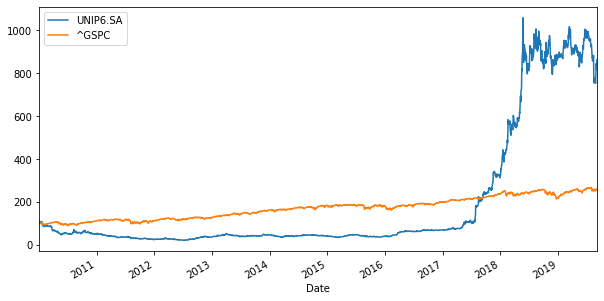

In [121]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

# Obj: Encontrar uma fronteira eficiente

In [122]:
log_returns = np.log(pf_data / pf_data.shift(1)) #taxa de retorno log.

In [123]:
log_returns.mean() * 250 #médias

UNIP6.SA    0.225161
^GSPC       0.107574
dtype: float64

In [124]:
log_returns.cov() * 250 #covariância período anual

,UNIP6.SA,^GSPC
UNIP6.SA,0.157212,0.010500
^GSPC,0.010500,0.023005


In [125]:
log_returns.corr() #correlação

,UNIP6.SA,^GSPC
UNIP6.SA,1.000000,0.174487
^GSPC,0.174487,1.000000


In [126]:
num_assets = len(assets) #contar o número de ativos

In [127]:
num_assets

2

In [128]:
#peso da carteira aleatórios, sempre somando 1 no final 

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.49858029, 0.50141971])

In [129]:
weights[0] + weights[1]

1.0

# Retorno esperado de um portfólio

In [130]:
np.sum(weights * log_returns.mean()) * 250 #soma do produto da média dos retornos log. anualizados pelos respectivos pesos.

0.16620046193196256

#  Variância esperada do portfólio

In [131]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.05011417761166376

# Volatidade esperada do portfólio

In [132]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.22386196106454476

In [133]:
#1000 simulações de mínima variância serão plotadas 
#não são 1000 investimentos diferentes, será considerado 1000 combinações dos mesmos ativos ITSA E BOVESPA

In [134]:
pfolio_returns = []
pfolio_volatilities = []

In [135]:
for x in range(1000):
    weights  = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_returns, pfolio_volatilities

(array([0.12368384, 0.16654033, 0.15759568, 0.21859519, 0.13218548,
        0.17084708, 0.11994972, 0.18783944, 0.1963426 , 0.15911571,
        0.18269726, 0.15096821, 0.16135496, 0.1701946 , 0.20760136,
        0.15867111, 0.17097534, 0.14679025, 0.12416796, 0.13332504,
        0.14076697, 0.1587352 , 0.15158923, 0.15900758, 0.16252421,
        0.19215616, 0.18814863, 0.16069862, 0.1517357 , 0.11818818,
        0.20569614, 0.1884022 , 0.16305197, 0.12270047, 0.16824564,
        0.1688413 , 0.1698845 , 0.14992473, 0.15870701, 0.18768237,
        0.14803218, 0.17429779, 0.17005033, 0.12736469, 0.16062989,
        0.15618627, 0.12214251, 0.1630194 , 0.20609934, 0.17697269,
        0.1757531 , 0.2205643 , 0.20589673, 0.22287156, 0.15977278,
        0.16823606, 0.15402773, 0.16753308, 0.15791072, 0.15312996,
        0.16630686, 0.19925302, 0.19022078, 0.17402112, 0.11764258,
        0.21493062, 0.19691452, 0.17674413, 0.16827239, 0.16469857,
        0.21834468, 0.19084624, 0.14065265, 0.14

In [136]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [137]:
portfolios.head()

,Return,Volatility
0,0.123684,0.150222
1,0.166540,0.224727
2,0.157596,0.202926
3,0.218595,0.375932
4,0.132185,0.157306


In [138]:
portfolios.tail()

,Return,Volatility
995,0.167108,0.226176
996,0.140840,0.169330
997,0.116814,0.148400
998,0.150328,0.186976
999,0.190268,0.290105


Text(0, 0.5, 'Expected Return')

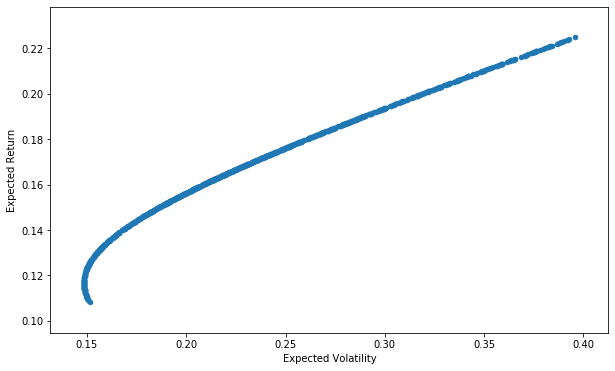

In [139]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6)) #satter = gráfico de dispersão
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')